In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
def main(filetobechecked):
    # Read the dataset given to us
    data = pd.read_csv(filetobechecked)

    # Extract features and target variable
    y = data['SalePrice']
    x1 = data['GrLivArea']
    x2 = data['GarageCars']
    x3 = data['TotalBsmtSF']
    x4 = data['1stFlrSF']
    x5 = data['FullBath']
    x6 = data['TotRmsAbvGrd']
    x7 = data['YearBuilt']
    x8 = data['YearRemodAdd']
    x9 = data['OverallQual']

    #normalisation function to scale values between 0 and 1 to get more accurate and faster convergence in gradient descent
    def min_max_normalisation(values):
        minimum=min(values)
        maximum=max(values)

        if maximum==minimum:
            normalised_val=[0.0 for val in values]
            # to prevent zero division error

        else:
            normalised_val=[(((x-minimum)/(maximum-minimum))*(1-0))+0 for x in values]
            #normalising using the normalisation formula

        return normalised_val


    #gradient descent funtion
    def gradient_descent(y,x,m,c,learning_rate,iterations):

        n=len(y) 
        #n=number of data points

        for i in range(iterations):
            dm=0
            dc=0

            for j in range(n):
                # Calculate the predicted value
                y_pred = m * x[j] + c

                # Update the partial derivatives
                dm += (2 / n) * x[j] * (y_pred - y[j])
                dc += (2 / n) * (y_pred - y[j])

            # Update m and c using the learning rate
            m -= learning_rate * dm
            c -= learning_rate * dc

        return m, c


    #function call now begining

    #normalising all the values im the data given to us
    normalisedx1=min_max_normalisation(x1)
    normalisedx2=min_max_normalisation(x2)
    normalisedx3=min_max_normalisation(x3)
    normalisedx4=min_max_normalisation(x4)
    normalisedx5=min_max_normalisation(x5)
    normalisedx6=min_max_normalisation(x6)
    normalisedx7=min_max_normalisation(x7)
    normalisedx8=min_max_normalisation(x8)
    normalisedx9=min_max_normalisation(x9)

    # Initial guesses and hyperparameters
    initial_m = 0.0  # Initial guess for the slopes
    initial_c = 0.0  # Initial guess for the intercept
    learning_rate = 0.0007
    iterations = len(normalisedx1)

    m1, c = gradient_descent(y, normalisedx1, initial_m, initial_c, learning_rate, iterations)
    m2, c = gradient_descent(y, normalisedx2, initial_m, initial_c, learning_rate, iterations)
    m3, c = gradient_descent(y, normalisedx3, initial_m, initial_c, learning_rate, iterations)
    m4, c = gradient_descent(y, normalisedx4, initial_m, initial_c, learning_rate, iterations)
    m5, c = gradient_descent(y, normalisedx5, initial_m, initial_c, learning_rate, iterations)
    m6, c = gradient_descent(y, normalisedx6, initial_m, initial_c, learning_rate, iterations)
    m7, c = gradient_descent(y, normalisedx7, initial_m, initial_c, learning_rate, iterations)
    m8, c = gradient_descent(y, normalisedx8, initial_m, initial_c, learning_rate, iterations)
    m9, c = gradient_descent(y, normalisedx9, initial_m, initial_c, learning_rate, iterations)


    # Convert lists to NumPy arrays

    x1 = np.array(normalisedx1)
    x2 = np.array(normalisedx2)
    x3 = np.array(normalisedx3)
    x4 = np.array(normalisedx4)
    x5 = np.array(normalisedx5)
    x6 = np.array(normalisedx6)
    x7 = np.array(normalisedx7)
    x8 = np.array(normalisedx8)
    x9 = np.array(normalisedx9)
   

    #print(m1*x1)linear regression formlua
    a = m1*x1 + m2*x2 + m3*x3 + m4*x5 + m5*x5 + m6*x6 + m7*x7 +m8*x8 + m9*x9 + c
    print(a) #this is working

    #calculate accuracy using rsquared method
    def accuracy(targets, prediction):
        residual_sum_square=np.sum((targets-prediction)**2)
        total_sum_square=np.sum((targets-np.mean(targets))**2)
        rsquared= 1-(residual_sum_square/total_sum_square)
        return rsquared
                


    # Scatter plot
    plt.scatter( y, a, color="red")

    # Plot the regression line
    plt.plot( a,a, color="black")

    # Display the plot
    plt.show()

    print(accuracy(y,a))


[351228.53588682 352839.60349407 367286.32188705 ... 282774.02894472
 385019.51046773 442112.16111607]


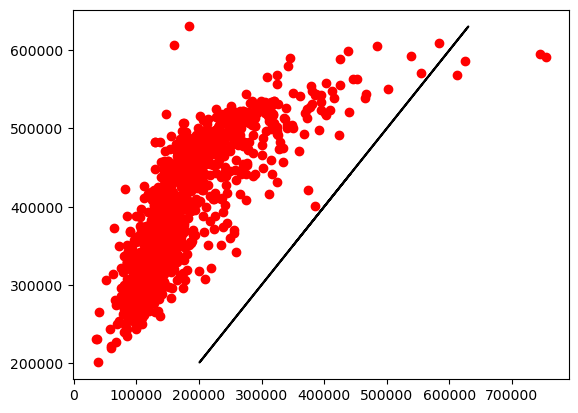

-7.278413387308817


In [7]:

main("/Users/rohanshenoy/Downloads/train (5).csv")

[244178.10109681 189696.32415123 215520.10460737 162803.41220372
 160072.21234666 173580.01482264 169089.69659009 203412.98347747
 224546.94300419 155739.56639326 228331.75270963 146927.02411126
 168294.81783318 167719.31165983 231643.24124694 161578.55375695
 220946.84183128 225342.42189934 183515.2883668  190527.6982317
 226516.32792561 234720.86783517 224654.52340979 171606.93784189
 225507.09568573 170413.55029609 180719.28906564 174083.245969
 160102.19910651 206297.57826512 246268.99362884 185431.03371736
 221881.63844142 136968.63344413 160638.88019078 171899.35678694
  95101.33020571 205479.1839183  283537.12801346 219106.74369769
 168424.286586   155475.26133258 128457.51945136 140630.74391746
 172251.46005249 186841.6572231  135160.25552394 230709.38047598
 156531.36461908 169411.18306758 164817.20475473 233827.98779667
 235366.41863624 227169.67231198 149143.87641786 138071.03453836
 225692.10354494 219160.55849074 227910.57781095 151256.94755488
 212394.42076868 215141.9701

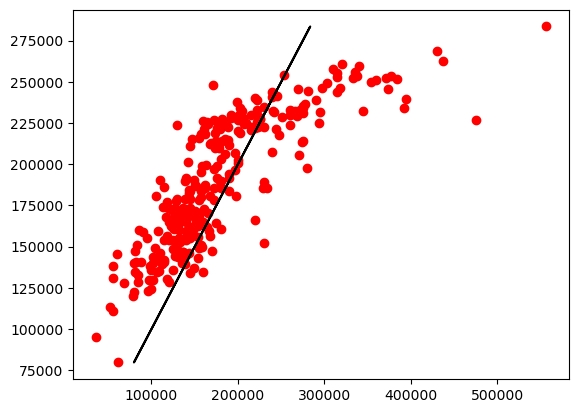

0.5583525584609685


In [8]:
main("/Users/rohanshenoy/Downloads/test.csv")